In [80]:
# DATA READING BLOCK
import numpy as np
import matplotlib.pyplot as plt
import csv
from PIL import Image
import cv2

def readTrafficSigns(rootpath):
    images = []
    labels = []
    Roi_X1 = []
    Roi_Y1 = []
    Roi_X2 = []
    Roi_Y2 = []

    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader)
        for row in gtReader:
            images.append(cv2.imread(prefix + row[0]))
            Roi_X1.append(int(row[3]))
            Roi_Y1.append(int(row[4]))
            Roi_X2.append(int(row[5]))
            Roi_Y2.append(int(row[6]))
            labels.append(row[7])
        gtFile.close()
    return images, labels, Roi_X1, Roi_Y1, Roi_X2, Roi_Y2
images,labels, Roi_X1, Roi_Y1, Roi_X2, Roi_Y2 = readTrafficSigns('C:/Users/Pradeep/PycharmProjects/IcvTask1/GTSRB/Final_Training/Images/')  

print('Read '+str(len(images))+' images successfully')

Read 39209 images successfully


In [81]:
# CROPPIMNG IMAGES WITH ROI BLOCK
cropped_images = []
for im in range(len(images)):
    cropped_images.append(images[im][Roi_X1[im]:Roi_X2[im]+1,Roi_Y1[im]:Roi_Y2[im]+1])
    
print('Cropped / Fitltered '+str(len(images))+' images successfully')


Cropped / Fitltered 39209 images successfully


In [82]:
# CLAHE ENHANCEMENT ON THE OCV IMAGES
import cv2

clahe = cv2.createCLAHE()
enhanced_images = []
for im in cropped_images:
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    enhanced_images.append(clahe.apply(im))

print('enhanced '+str(len(enhanced_images))+' images successfully')


enhanced 39209 images successfully


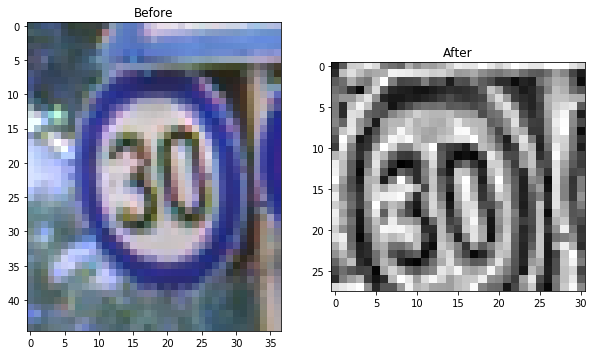

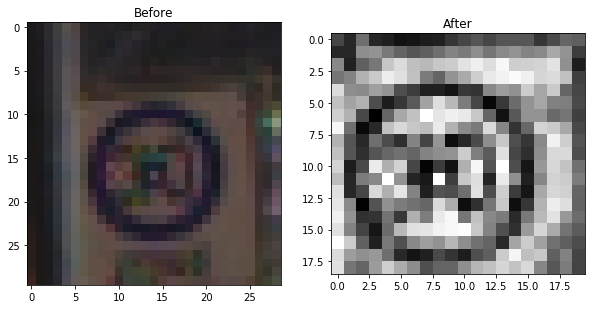

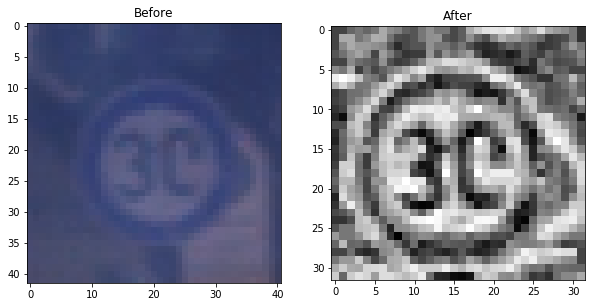

In [54]:
import numpy as np
index_val = list(set(np.random.randint(0, len(enhanced_images), 3)))

for row in range(len(index_val)):
    fig = plt.figure(figsize = (10, 30))
    plt_list = {'Before':images[index_val[row]], 'After':enhanced_images[index_val[row]]}
    
    for count, cols in enumerate(plt_list.keys()):
        fig.add_subplot(len(index_val), len(plt_list), count + 1)
        plt.title(cols)
        plt.imshow(plt_list[cols], cmap='gray')
        
    plt_list = {}
    plt.show()

In [83]:
from skimage.transform import resize
resized_images = []
for im in enhanced_images:
    resized_images.append(resize(im, (32,32),
                       anti_aliasing=False))

print('Resized '+str(len(resized_images))+' images successfully')

Resized 39209 images successfully


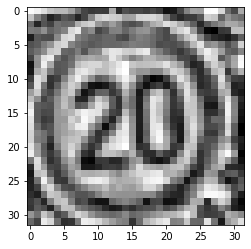

In [58]:
plt.imshow(resized_images[55],cmap='gray')

In [84]:
resized_images_array = np.array(resized_images, dtype='float')
labels_array = np.array(labels, dtype='int')  

print('Block ran without errors')

Block ran without errors


In [85]:
from skimage import color
from sklearn import svm

resized_unrolled_images = []
for i in resized_images_array:
    resized_unrolled_images.append(np.ravel(i))
print('Numpy ravel success')

print('This is training monitor status in Console')
resized_unrolled_images_array = np.array(resized_unrolled_images)
clf = svm.SVC(gamma='scale', verbose = 100)
clf.fit(resized_unrolled_images_array, labels_array)

print('SVM Model training success')

Numpy ravel success
This is training monitor status in Console
[LibSVM]SVM Model training success


In [86]:
clf.get_params()
from joblib import dump, load
dump(clf, 'clahe_32x32_42_class.joblib') 

['clahe_32x32_42_class.joblib']

In [87]:
tmp = resized_unrolled_images_array[300:500]
#clf.score(tmp,labels_array[300:500])
clf2 = load('clahe_32x32_42_class.joblib')
clf2.score(tmp,labels_array[300:500])

0.99

In [88]:
clf.predict(resized_unrolled_images_array[250].reshape(1,1024))

array([1])

In [100]:
test_size = 100
ran = list(set(np.random.randint(0, len(resized_unrolled_images_array), test_size)))

predicted_labels = []
original_labels = []
for test in ran:
    predicted_labels.append((clf.predict(resized_unrolled_images_array[test].reshape(1,1024)))[0]) 
    original_labels.append(labels[test])
print(len(predicted_labels))

100


In [101]:
original_labels_mod = []
predicted_labels_mod = []
for pred,orig in zip(predicted_labels,original_labels):
    if(int(pred) < 9):
        predicted_labels_mod.append('speed-sign')
    elif(pred == 11):
        predicted_labels_mod.append('priority-at-next-intersection-sign')
    elif(pred == 12):
        predicted_labels_mod.append('priority-road-sign')
    elif(pred == 13):
        predicted_labels_mod.append('give-way-sign')
    else:
        predicted_labels_mod.append('other-sign')
    
    if(int(orig) < 9):
        original_labels_mod.append('speed-sign')
    elif(orig == 11):
        original_labels_mod.append('priority-at-next-intersection-sign')
    elif(orig == 12):
        original_labels_mod.append('priority-road-sign')
    elif(orig == 13):
        original_labels_mod.append('warning-sign')
    else:
        original_labels_mod.append('other-sign')

In [102]:
error=0
for pred,orig in zip(predicted_labels_mod,original_labels_mod):
    if(pred != orig):
        error+=1
print('accuracy ='+str((test_size-error)/test_size))

accuracy =0.85
